In [43]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV

from sklearn import grid_search
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

plt=pyplot

In [44]:
dfrm = pd.read_csv("dummy2.csv") 

In [45]:
for i in dfrm.columns:
    print i
# print dfrm.shape

Accepted
Degree_Masters
GPA
Is_GPA
Is_Quant
Is_Verbal
Is_Writing
Quant_GRE_Normal
Semester_Fall
Sub_GRE
Verbal_GRE_Normal
Writing_GRE
School_arizonastateuniversity
School_bostonuniveristy
School_brownuniversity
School_buffalosuny
School_carnegiemellon
School_clemsonuniversity
School_coloradouniversityboulder
School_columbiauniversity
School_cornelluniversity
School_dartmouthcollege
School_duke
School_epfl
School_ethzurich
School_georgiatech
School_harvarduniversity
School_illinoisurbanachampaign
School_indianauniversitybloomington
School_iowasateuniversity
School_johnshopkinsuniversity
School_kingabdullahuniversityscienceandtechnology
School_mcgilluniversity
School_michiganstateuniversity
School_mit
School_newyorkuniversity
School_northcarolinastateuniverisy
School_northeasternuniversity
School_northwesternuniversity
School_ohiostateuniversity
School_oregonstateuniversity
School_oxford
School_pennstateuniversity
School_pittsburghu
School_princeton
School_purdueuniversity
School_renssel

In [46]:
dfrm.head()

,Accepted,Degree_Masters,GPA,Is_GPA,Is_Quant,Is_Verbal,Is_Writing,Quant_GRE_Normal,Semester_Fall,Sub_GRE,...,School_universitywisconsinmadison,School_upenn,School_usc,School_vanderbiltuniversity,School_virginiatech,School_yale,Status_A,Status_I,Status_O,Status_U
0,0,0,2,1,1,1,1,166,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,2,1,1,1,1,168,1,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,2,1,1,1,1,166,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,2,1,1,1,1,163,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,2,1,1,1,1,166,1,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
dfarray = dfrm.as_matrix()

In [48]:
print len(dfarray)
print dfarray.shape
print dfarray[0]

9261
(9261, 90)
[   0.     0.     2.     1.     1.     1.     1.   166.     1.     0.   165.
    5.5    0.     0.     0.     0.     0.     0.     0.     0.     1.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     1.
    0.     0. ]


###Data-Target: Arrays

In [49]:
y = dfarray[:, [0]]
# X = dfarray[np.r_[0:263, -263:0]]
X = np.delete(dfarray, np.s_[0:1:],1)

print y.shape
print X.shape

type(X)
print X[0]
print y[0]

(9261, 1)
(9261, 89)
[   0.     2.     1.     1.     1.     1.   166.     1.     0.   165.
    5.5    0.     0.     0.     0.     0.     0.     0.     0.     1.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     1.
    0.     0. ]
[ 0.]


###Train-Test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=0)

print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(7408, 89)
(7408, 1)
(1853, 89)
(1853, 1)


###Random Forest

In [51]:
## Training!
rf = RandomForestClassifier(n_estimators=500, oob_score=True, 
                            criterion='entropy') # initialize

rf.fit(X_train, y_train) # fit the data to the algorithm

/Users/oksitosin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

###Cross Validation

In [52]:
def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold cross validation iterator
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print ("Mean score: {0:.3f} (+/-{1:.3f})".format(
        np.mean(scores), sem(scores)))

In [53]:
evaluate_cross_validation(rf, X_train, y_train, 5)

/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1459: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1459: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1459: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1459: DataConversionWarning: A column-vector 

[ 0.85  0.86  0.87  0.87  0.87]
Mean score: 0.863 (+/-0.004)


/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1459: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


###Model Evaluation -- Precision/Recall/Accuracy

In [54]:
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

In [55]:
train_and_evaluate(rf, X_train, X_test, y_train, y_test)

Accuracy on training set:
0.999460043197
Accuracy on testing set:
0.864004317323
Classification Report:
             precision    recall  f1-score   support

        0.0       0.87      0.89      0.88      1037
        1.0       0.86      0.83      0.84       816

avg / total       0.86      0.86      0.86      1853

Confusion Matrix:
[[923 114]
 [138 678]]


/Users/oksitosin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


###Learning Curve

In [56]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1459: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1459: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1459: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1459: DataConversionWarning: A column-vector 

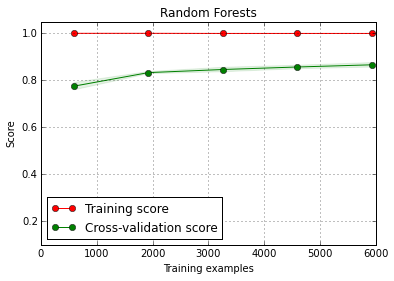

In [57]:
cv = KFold(n=len(X_train), n_folds=5, shuffle=True, random_state=0)
plot_learning_curve(rf, 'Random Forests', X_train, y_train, (0.1, 1.05), cv=cv, n_jobs=4)

plt.show()

###Confusion Matrix

Normalized confusion matrix
[[ 0.89  0.11]
 [ 0.17  0.83]]


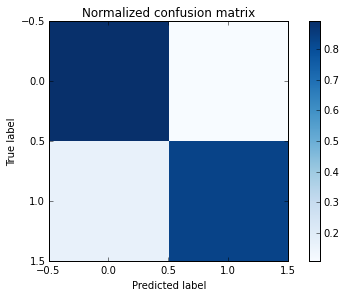

In [58]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = rf.predict(X_test)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# print('Confusion matrix, without normalization')
# print(cm)
# plt.figure()
# plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure(facecolor='white')
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

###ROC Curve

In [59]:
def draw_roc_curve(model, X_train, X_test, y_train, y_test):   
    
    try:
        y_score = model.fit(X_train, y_train).predict_proba(X_test)[:,1]
    except:
        y_score = model.fit(X_train, y_train).decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

/Users/oksitosin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


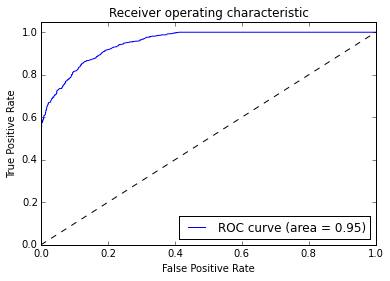

In [60]:
draw_roc_curve(rf, X_train, X_test, y_train, y_test )

In [67]:
dfrm.shape

(9261, 90)

In [69]:
dfrm = dfrm.drop('Accepted', axis=1)

In [70]:
dfrm.shape

(9261, 89)

###Feature importances with forests of trees -- ExtraTreeClassifier

This shows the use of forests of trees to evaluate the importance of features on classification task. 
The red bars are the feature importances of the forest, along with their inter-trees variability.

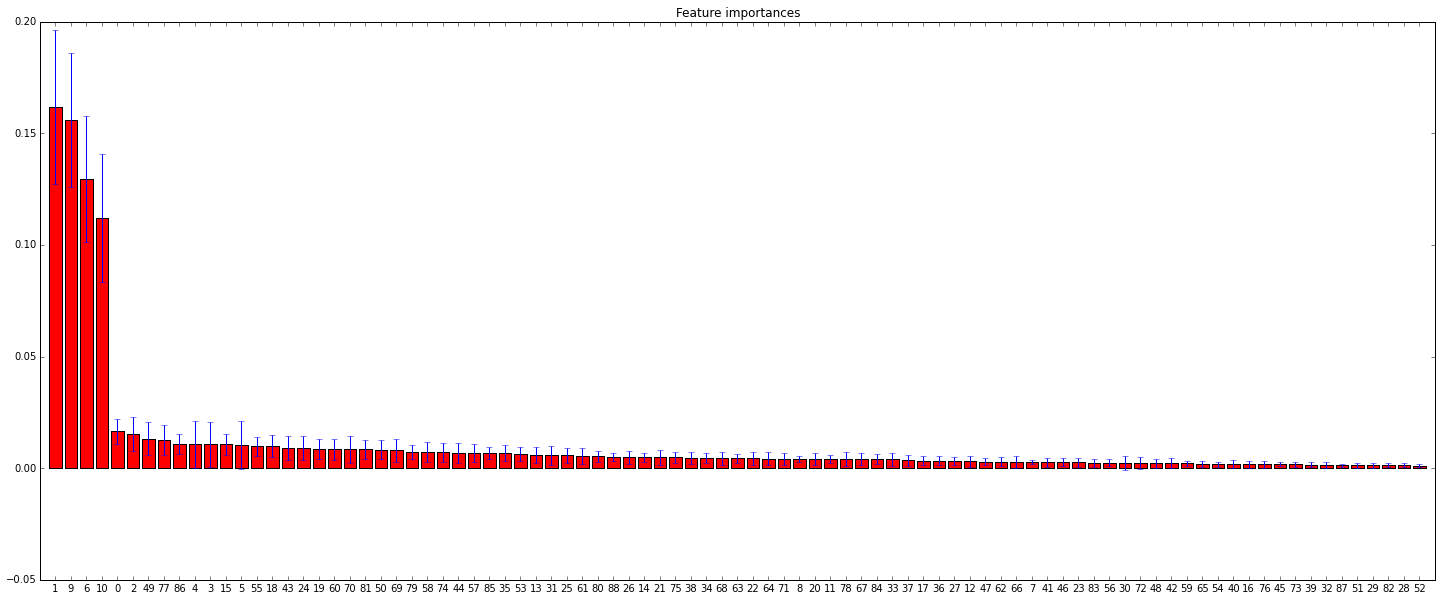

In [71]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


# # Build a forest and compute the feature importances
# forest = ExtraTreesClassifier(n_estimators=500,
#                               random_state=0)

# forest.fit(X, y)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(25,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [77]:
print dfrm.columns[1]
print dfrm.columns[9]
print dfrm.columns[6]
print dfrm.columns[10]
print dfrm.columns[0]
print dfrm.columns[2]
print dfrm.columns[49]
print dfrm.columns[77]

GPA
Verbal_GRE_Normal
Quant_GRE_Normal
Writing_GRE
Degree_Masters
Is_GPA
School_stanforduniversity
School_universitywashington


###Model Validation

In [25]:
for i in dfrm.columns:
    print i

Degree_Masters
GPA
Is_GPA
Is_Quant
Is_Verbal
Is_Writing
Quant_GRE_Normal
Semester_Fall
Sub_GRE
Verbal_GRE_Normal
Writing_GRE
School_arizonastateuniversity
School_bostonuniveristy
School_brownuniversity
School_buffalosuny
School_carnegiemellon
School_clemsonuniversity
School_coloradouniversityboulder
School_columbiauniversity
School_cornelluniversity
School_dartmouthcollege
School_duke
School_epfl
School_ethzurich
School_georgiatech
School_harvarduniversity
School_illinoisurbanachampaign
School_indianauniversitybloomington
School_iowasateuniversity
School_johnshopkinsuniversity
School_kingabdullahuniversityscienceandtechnology
School_mcgilluniversity
School_michiganstateuniversity
School_mit
School_newyorkuniversity
School_northcarolinastateuniverisy
School_northeasternuniversity
School_northwesternuniversity
School_ohiostateuniversity
School_oregonstateuniversity
School_oxford
School_pennstateuniversity
School_pittsburghu
School_princeton
School_purdueuniversity
School_rensselaerpolyte

In [26]:
col_list = []

for i in dfrm.columns:
    col_list.append(i)
    
col_list[44]

'School_purdueuniversity'

In [27]:
### Masters
### GPA 3.7
### Quant:163
### Fall 1
### Subject 0
### Verbal 150
### Writing 4.5
### Purdue
### I




purdue = np.array([1,3.7,1,1,1,1,163,1,0,150,4.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0])
purdue

array([   1. ,    3.7,    1. ,    1. ,    1. ,    1. ,  163. ,    1. ,
          0. ,  150. ,    4.5,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    1. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    1. ,    0. ,
          0. ])

In [28]:
brown = np.array([1,3.7,163,1,0,150,4.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0])
brown

array([   1. ,    3.7,  163. ,    1. ,    0. ,  150. ,    4.5,    0. ,
          0. ,    1. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    1. ,    0. ,    0. ])

In [29]:
web = np.array([1,3.5,150,1,1,150,3.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0])
web

array([   1. ,    3.5,  150. ,    1. ,    1. ,  150. ,    3.5,    1. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    1. ,    0. ,    0. ,    0. ])

In [30]:
print rf.predict(purdue)
# print rf.predict(brown)

[ 0.]


In [31]:
print rf.predict_proba(purdue)
# print rf.predict_proba(brown)
# print rf.predict_proba(web)

[[ 0.63  0.37]]
